#         Awanit Saha B.tech CSE
# "Stock Market Prediction Using LSTM"

In [42]:

#Step 1: Importing the Libraries

# Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model


In [43]:
#Step 2: Getting to Visualising the Stock Market Prediction Data
# Get the Dataset
df = pd.read_excel("Minor Project Data set (Stock Price Prediction).xlsx", na_values=['null'], index_col='Date', parse_dates=True)
df.head()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [44]:
#Step 3: Checking for Null Values by Printing the DataFrame Shape
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1009, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

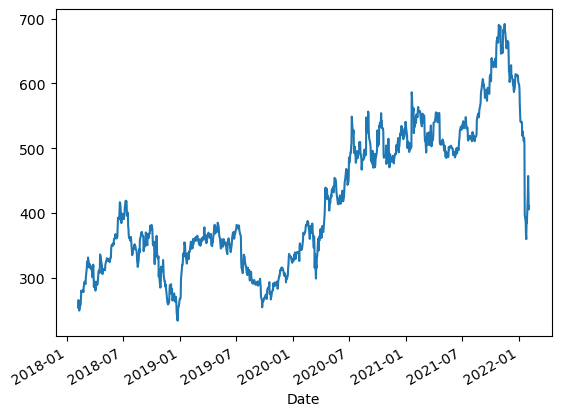

In [45]:
#Step 4: Plotting the True Adjusted Close Value
#Plot the True Adj Close Value
df['Adj Close'].plot()


In [46]:
#Step 5: Setting the Target Variable and Selecting the Features

#Set Target Variable
output_var = PD.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

#Step 6: Scaling

#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2018-02-05,0.061253,0.038304,0.041331,0.186150
2018-02-06,0.030059,0.035640,0.030273,0.198264
2018-02-07,0.071243,0.048408,0.072770,0.135690
2018-02-08,0.072334,0.037683,0.041265,0.141320
2018-02-09,0.043474,0.011436,0.010729,0.272902


In [47]:
#Step 7: Creating a Training Set and a Test Set for Stock Market Prediction

#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        
        
#Step 8: Data Processing For LSTM

#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

#Step 9: Building the LSTM Model for Stock Market Prediction
!pip install pydot
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [48]:
#Step 10: Training the Stock Market Prediction Model

#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
115/115 [==============================] - 2s 2ms/step - loss: 169688.6406
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 168416.6406
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 165473.0000
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 160363.4688
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 153106.0781
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 144082.6094
Epoch 7/100
115/115 [==============================] - 0s 2ms/step - loss: 133779.4219
Epoch 8/100
115/115 [==============================] - 0s 2ms/step - loss: 122649.4922
Epoch 9/100
115/115 [==============================] - 0s 2ms/step - loss: 111076.2344
Epoch 10/100
115/115 [==============================] - 0s 2ms/step - loss: 99377.2812
Epoch 11/100
115/115 [==============================] - 0s 2ms/step - loss: 87815.6172
Epoch 12/100
115/115 [=====================

115/115 [==============================] - 0s 2ms/step - loss: 77.7860
Epoch 97/100
115/115 [==============================] - 0s 2ms/step - loss: 75.5225
Epoch 98/100
115/115 [==============================] - 0s 2ms/step - loss: 73.3287
Epoch 99/100
115/115 [==============================] - 0s 3ms/step - loss: 71.2041
Epoch 100/100
115/115 [==============================] - 0s 2ms/step - loss: 69.1484


In [49]:
#Step 11: Making the LSTM Prediction

#LSTM Prediction
y_pred= lstm.predict(X_test)

3/3 [==============================] - 0s 2ms/step


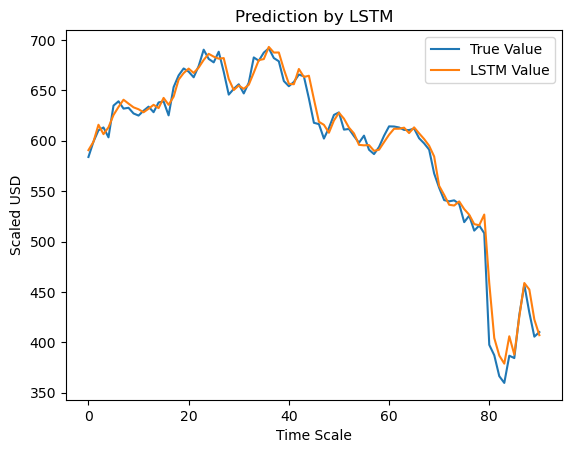

In [50]:
#Step 12: Comparing Predicted vs True Adjusted Close Value – LSTM


#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()


The graph above demonstrates that the extremely basic single LSTM network model created above detects some patterns.
We may get a more accurate depiction of every specific company’s stock value by fine-tuning many parameters and 
adding more LSTM layers to the model.

# Conclusion


However, with the introduction of Machine Learning and its strong algorithms, the most recent market research and
Stock Market Prediction using machine learning advancements have begun to include such approaches in analyzing stock
market data. The Opening Value of the stock, the Highest and Lowest values of that stock on the same day, as well as
the Closing Value at the end of the day are all indicated for each date. Furthermore, the total volume of the stocks 
in the market is provided; with this information, it is up to the job of a Machine Learning Data Scientist to look at
the data and develop different algorithms that may help in finding appropriate stocks values.

Predicting the stock market was a time-consuming and laborious procedure a few years or even a decade ago. However
, with the application of machine learning for stock market forecasts, the procedure has become much simpler. 
Machine learning not only saves time and resources but also outperforms people in terms of performance. it will
always prefer to use a trained computer algorithm since it will advise you based only on facts, numbers, and data
and will not factor in emotions or prejudice. It would be interesting to incorporate sentiment analysis on news 
& social media regarding the stock market in general, as well as a given stock of interest.
